In [2]:
#Obtención de la información (Datos Demográficos de Superdatascience.com)

import pandas as pd
import numpy as np
import scipy.stats

filename = 'https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P4-Demographic-Data.csv'
data = pd.read_csv(filename, header=0)

data.head(10) #Ver las 10 primeras filas


,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9000,High income
1,Afghanistan,AFG,35.253,5.9000,Low income
2,Angola,AGO,45.985,19.1000,Upper middle income
3,Albania,ALB,12.877,57.2000,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0000,High income
5,Argentina,ARG,17.716,59.9000,High income
6,Armenia,ARM,13.308,41.9000,Lower middle income
7,Antigua and Barbuda,ATG,16.447,63.4000,High income
8,Australia,AUS,13.200,83.0000,High income
9,Austria,AUT,9.400,80.6188,High income


In [3]:
data.isnull().sum()

Country Name      0
Country Code      0
Birth rate        0
Internet users    0
Income Group      0
dtype: int64

In [7]:
#Paquetes para análisis estadístico
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

#Extracción del promedio con numpy
np.mean(data['Internet users'])


42.0764708919487

In [8]:
#Extracción del promedio con pandas
data['Internet users'].mean()

42.0764708919487

In [7]:
data.groupby('Income Group')['Internet users'].mean()

Income Group
High income            74.231684
Low income              5.988333
Lower middle income    22.366386
Upper middle income    40.279577
Name: Internet users, dtype: float64

In [9]:
#mediana con numpy
np.median(data['Internet users'])

41.0

In [10]:
#mediana con pandas
data['Internet users'].median()

41.0

In [11]:
data.groupby('Income Group')['Internet users'].median()

Income Group
High income            74.10
Low income              4.45
Lower middle income    19.85
Upper middle income    43.63
Name: Internet users, dtype: float64

In [27]:
data['Income Group'].mode()

0    High income
Name: Income Group, dtype: object

In [12]:
data.groupby('Income Group')['Country Name'].count()

Income Group
High income            67
Low income             30
Lower middle income    50
Upper middle income    48
Name: Country Name, dtype: int64

In [13]:
#varianza con numpy
np.var(data['Internet users'], ddof=1)

842.7866765672667

In [34]:
#varianza con pandas
data['Internet users'].var(ddof=1)

842.7866765672667

In [14]:
data.groupby('Income Group')['Internet users'].var(ddof=1)

Income Group
High income            205.441680
Low income              24.086842
Lower middle income    196.051688
Upper middle income    249.176134
Name: Internet users, dtype: float64

In [15]:
#std dev con numpy
np.std(data['Internet users'], ddof=1)

29.030788424830398

In [16]:
#std dev con pandas
data['Internet users'].std(ddof=1)

29.030788424830398

In [17]:
data.groupby('Income Group')['Internet users'].std(ddof=1)

Income Group
High income            14.333237
Low income              4.907835
Lower middle income    14.001846
Upper middle income    15.785314
Name: Internet users, dtype: float64

In [18]:
#skewness con pandas
data['Internet users'].skew()

0.18229885928676587

In [32]:
data['Internet users'].kurtosis()

-1.244023610210651

In [20]:
scipy.stats.skew(data['Internet users'], bias=False)

0.1822988592867659

In [21]:
#Skewness con Pandas dentro grupos
data.groupby('Income Group')['Internet users'].skew()

Income Group
High income           -0.916863
Low income             1.176777
Lower middle income    0.474051
Upper middle income   -0.402620
Name: Internet users, dtype: float64

In [22]:
#Percentiles con Numpy
np.percentile(data['Internet users'], [25, 50, 75])

array([14.52 , 41.   , 66.225])

In [26]:
#Percentiles con Pandas
data['Internet users'].quantile([0, 0.25, 0.5, 0.75, 1])

0.00     0.9000
0.25    14.5200
0.50    41.0000
0.75    66.2250
1.00    96.5468
Name: Internet users, dtype: float64

In [25]:
data.groupby('Income Group')['Internet users'].quantile([0, 0.25, 0.5, 0.75, 1])

Income Group             
High income          0.00    16.4000
                     0.25    65.6274
                     0.50    74.1000
                     0.75    84.4850
                     1.00    96.5468
Low income           0.00     0.9000
                     0.25     2.2250
                     0.50     4.4500
                     0.75     8.4500
                     1.00    18.5000
Lower middle income  0.00     1.1000
                     0.25    11.3500
                     0.50    19.8500
                     0.75    36.4550
                     1.00    56.0000
Upper middle income  0.00     9.2000
                     0.25    32.6875
                     0.50    43.6300
                     0.75    51.5500
                     1.00    70.5000
Name: Internet users, dtype: float64

In [23]:
#Rango con numpy
np.ptp(data['Internet users'])

95.6468

In [24]:
#Rango paso a paso con numpy
np.max(data['Internet users'])-np.min(data['Internet users'])

95.6468

In [27]:
#Rango paso a paso con pandas
data['Internet users'].max()-data['Internet users'].min()

95.6468

In [28]:
#Rango intercuantílico paso a paso con numpy
x=data['Internet users']
quartiles = np.quantile(x, [0.25, 0.75])

In [29]:
quartiles

array([14.52 , 66.225])

In [28]:
quartiles[1] - quartiles[0]

51.705

In [63]:
#Rango intercuantílico paso a paso con pandas
x=data['Internet users']
cuartiles = x.quantile([0.25,0.75])
cuartiles

0.25    14.520
0.75    66.225
Name: Internet users, dtype: float64

In [65]:
cuartiles[0.75]-cuartiles[0.25]

51.705

In [30]:
#Comando describe con numpy
x=data['Internet users']
resultado=scipy.stats.describe(x, ddof=1, bias=False)

In [31]:
resultado

DescribeResult(nobs=195, minmax=(0.9, 96.5468), mean=42.07647089194872, variance=842.7866765672659, skewness=0.1822988592867659, kurtosis=-1.2440236102106508)

In [79]:
resultado.nobs

195

In [80]:
resultado.minmax[1] #max

96.5468

In [81]:
resultado.minmax[0] #min

0.9

In [82]:
resultado.variance

842.7866765672659

In [69]:
scipy.stats.describe(x, ddof=1, bias=True)

DescribeResult(nobs=195, minmax=(0.9, 96.5468), mean=42.07647089194872, variance=842.7866765672659, skewness=0.18089355320326375, kurtosis=-1.2429659925301357)

In [4]:
x=data['Internet users']
resultado=x.describe()

In [5]:
resultado

count    195.000000
mean      42.076471
std       29.030788
min        0.900000
25%       14.520000
50%       41.000000
75%       66.225000
max       96.546800
Name: Internet users, dtype: float64

In [6]:
resultado['mean']

42.0764708919487

In [7]:
resultado['std']

29.030788424830398

In [8]:
resultado['50%']

41.0

In [33]:
# Comando Describe para Pandas
data.groupby('Income Group')['Internet users'].describe()

,count,mean,std,min,25%,50%,75%,max
Income Group,,,,,,,,
High income,67.0,74.231684,14.333237,16.4,65.6274,74.10,84.485,96.5468
Low income,30.0,5.988333,4.907835,0.9,2.2250,4.45,8.450,18.5000
Lower middle income,50.0,22.366386,14.001846,1.1,11.3500,19.85,36.455,56.0000
Upper middle income,48.0,40.279577,15.785314,9.2,32.6875,43.63,51.550,70.5000


In [29]:
quartiles

array([14.52 , 66.225])

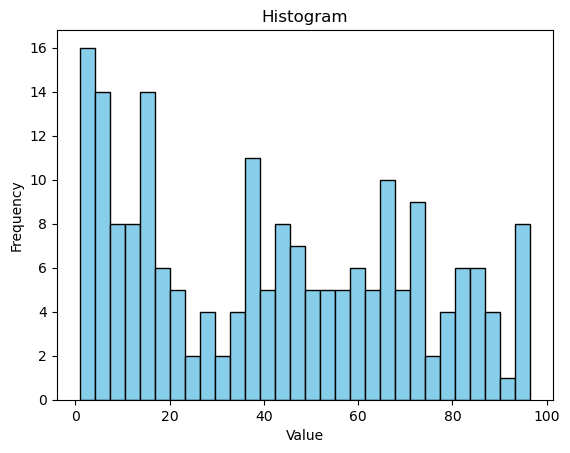

In [19]:
import matplotlib.pyplot as plt
plt.hist(data['Internet users'], bins=30, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

# Show the plot
plt.show()

In [8]:
subconjunto_data1=data[data['Income Group']=='High income']

In [9]:
subconjunto_data1.head(10)

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.90000,High income
4,United Arab Emirates,ARE,11.044,88.00000,High income
5,Argentina,ARG,17.716,59.90000,High income
7,Antigua and Barbuda,ATG,16.447,63.40000,High income
8,Australia,AUS,13.200,83.00000,High income
9,Austria,AUT,9.400,80.61880,High income
12,Belgium,BEL,11.200,82.17020,High income
17,Bahrain,BHR,15.040,90.00004,High income
18,"Bahamas, The",BHS,15.339,72.00000,High income
22,Bermuda,BMU,10.400,95.30000,High income


In [10]:
subconjunto_data2=data[data['Internet users']>10]

In [13]:
subconjunto_data2.head(10)

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9000,High income
2,Angola,AGO,45.985,19.1000,Upper middle income
3,Albania,ALB,12.877,57.2000,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0000,High income
5,Argentina,ARG,17.716,59.9000,High income
6,Armenia,ARM,13.308,41.9000,Lower middle income
7,Antigua and Barbuda,ATG,16.447,63.4000,High income
8,Australia,AUS,13.200,83.0000,High income
9,Austria,AUT,9.400,80.6188,High income
10,Azerbaijan,AZE,18.300,58.7000,Upper middle income


In [17]:
subconjunto_data3=data[data['Internet users']>10 | data['Income Group']=='High income']

TypeError: Cannot perform 'ror_' with a dtyped [object] array and scalar of type [bool]